In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'

Initialization done, Notebook was last run on: 14/01/2020


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [6]:
#file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
#file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/bkg_1TFV/'

### Combined energy scale
CES calculated with z-dependent: https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:xenon1t:g1g2resfordec#energy_calibration_with_z-dependence_using_the_doke_method

- g1 = (0.1432 +/- 0.0004) + (0.000049 +/- 0.000007)*z
- g2 = (11.63 +/- 0.10) + (0.009 +/- 0.002)*z

In [4]:
def CES(data, cs2):
    W = 13.7 #eV
    g1 = 0.1478 + 0.00007*data['z_3d_nn_tf']
    g2 = 10.501 - 0.0151*data['z_3d_nn_tf']
    return(W*((data['cs1_nn_tf']/g1) + (data[str(cs2)]/g2)))

### Radon data: 

### Neutron Generator data

Nello stato attuale i dati di Neutron Genarato non sono utili. Cambiare il Fiducial Volume cut.
Ad ogni modo, come diceva Fei, ho bisogno di sorgenti beta. 

### Background data

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


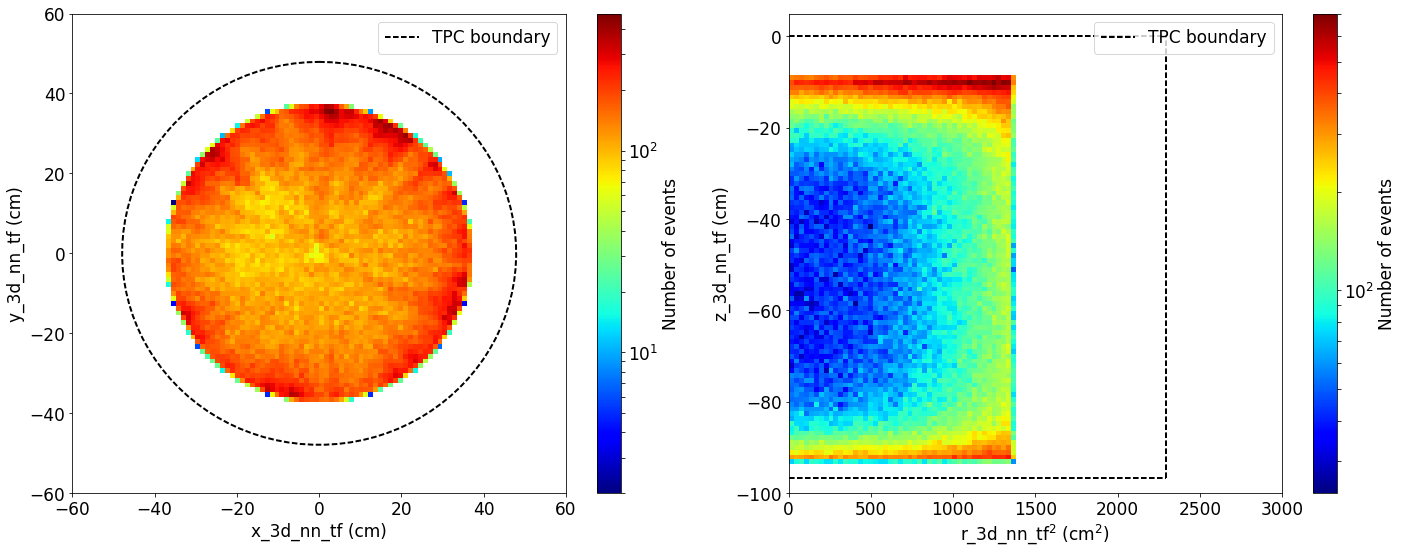

In [7]:
bkg = pd.read_pickle(file_path + 'bkg_cutted_1TFV_SR1_S1PL.pkl')
bkg['CES'] = CES(bkg, 'cs2_bottom_nn_tf')
bkg_1 = bkg[bkg['s1']<3e4]
data_distribution(bkg_1, 'x_3d_nn_tf', 'y_3d_nn_tf', 'z_3d_nn_tf', 'r_3d_nn_tf', bins=[100,100])

In [8]:
for i in range(len(bkg.columns)): print(bkg.columns[i])

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


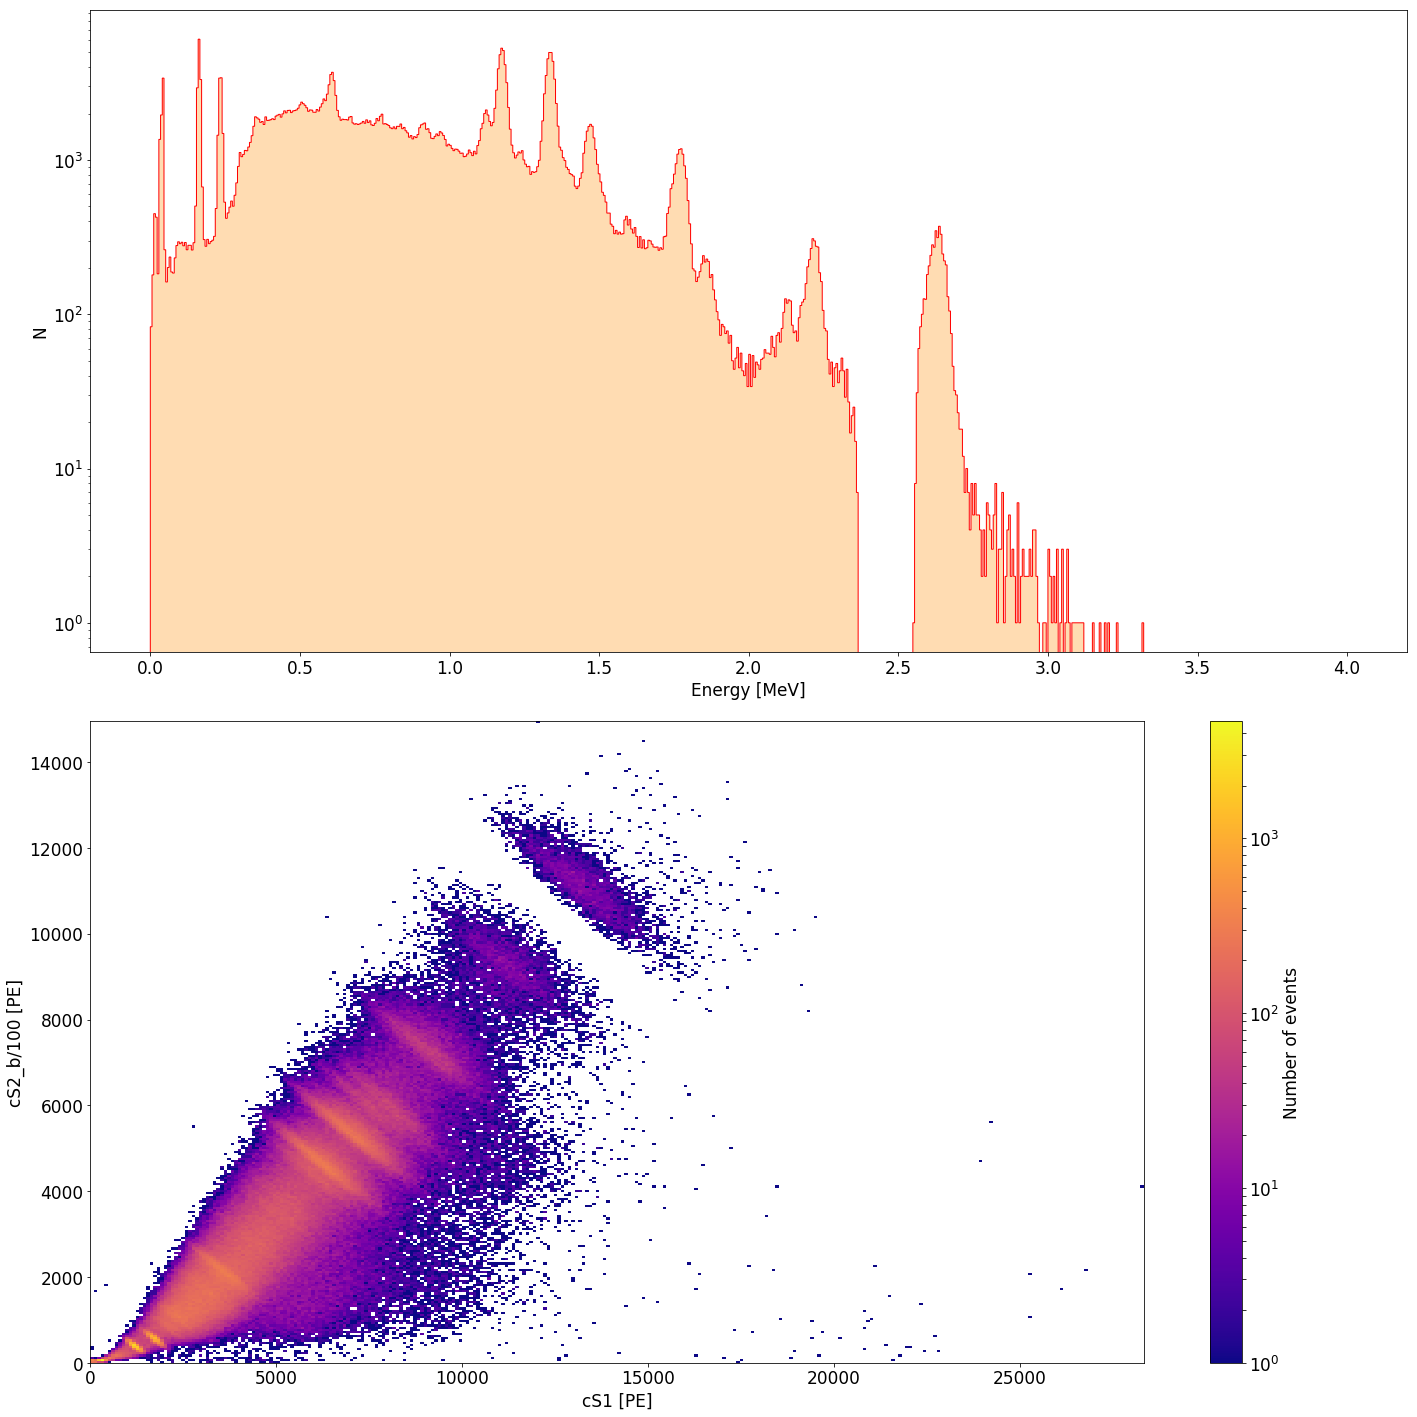

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.hist(bkg_1['CES']/10**6, bins = (700), 
         range=(0, 4), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(bkg_1['CES']/10**6, bins = (700), 
         range=(0, 4), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]')
plt.ylabel('N')
plt.yscale('log')

plt.subplot(212)
plt.hist2d(bkg_1['cs1_nn_tf'], bkg_1['cs2_bottom_nn_tf']/100, bins = (300, 300), 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2_b/100 [PE]') 

plt.tight_layout()
plt.show()

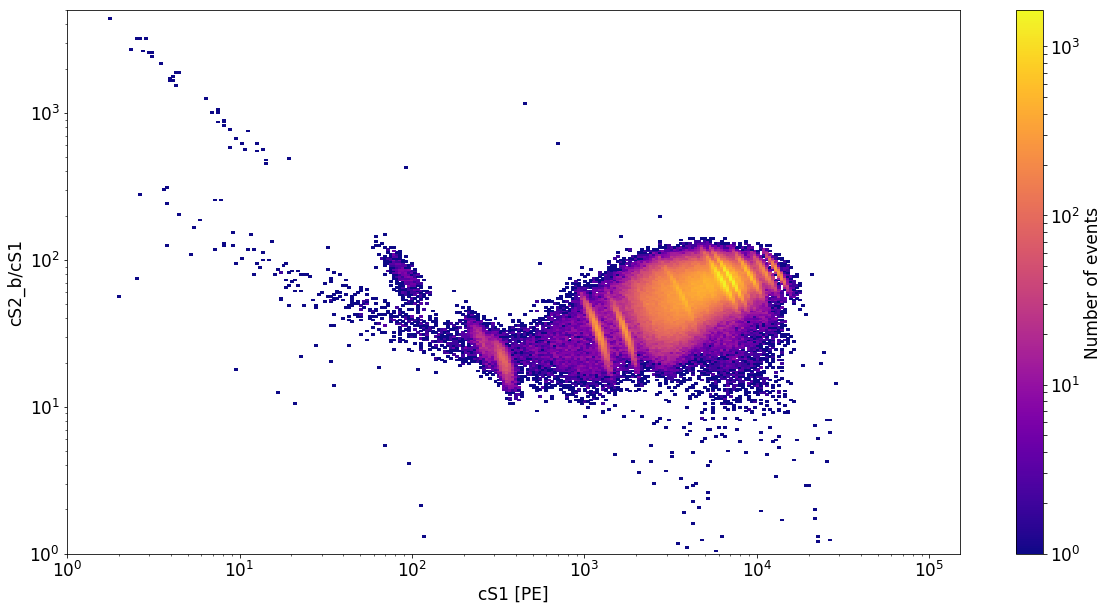

In [19]:
xbins = np.logspace(np.log10(1.0), np.log10(1.5e5), 300) # <- make a range from 10**xmin to 10**xmax
ybins = np.logspace(np.log10(1.0), np.log10(5e3), 300) # <- make a range from 10**ymin to 10**ymax
counts, _, _ = np.histogram2d(bkg_1['cs1_nn_tf'], bkg_1['cs2_bottom_nn_tf']/bkg_1['cs1_nn_tf'], bins=(xbins, ybins))

pcm = plt.pcolormesh(xbins, ybins, np.transpose(counts),
                    cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm())
plt.colorbar(pcm, label='Number of events')
plt.xscale("log")               # <- Activate log scale on X axis
plt.yscale("log")               # <- Activate log scale on Y axis
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2_b/cS1')

plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


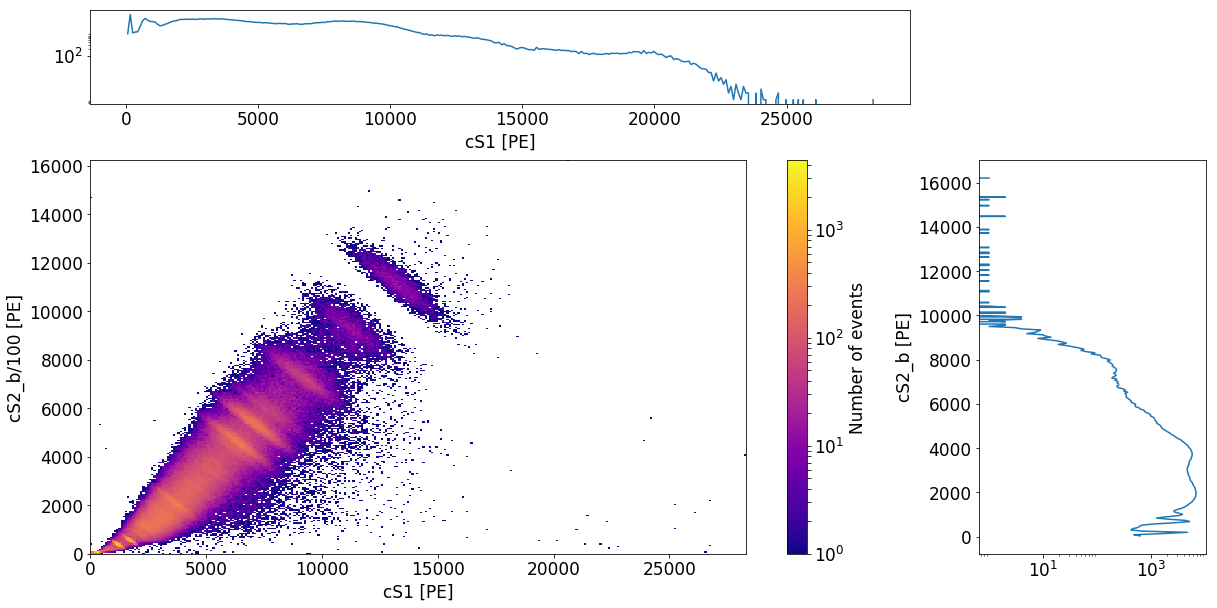

In [20]:
grid = plt.GridSpec(4, 4, wspace=0.3, hspace=0.6) #nrow=4 ncol=4

plt.subplot(grid[1:, :3])
counts, xedges, yedges, _ = plt.hist2d(bkg_1['cs1_nn_tf'], bkg_1['cs2_bottom_nn_tf']/100, bins = (300, 300), 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
counts[np.isnan(counts)] = 0
plt.colorbar(label='Number of events')
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2_b/100 [PE]') 

plt.subplot(grid[0, :3])
plt.plot(bin_center(xedges), np.sum(counts, axis=0))
plt.xlabel('cS1 [PE]')
plt.yscale('log')

plt.subplot(grid[1:, 3])
plt.plot(np.sum(counts, axis=1), bin_center(yedges))
plt.ylabel('cS2_b [PE]')
plt.xscale('log')

plt.show()

### Chek of the data

Nello spettro dei dai da Rn, c'è un picco taglaito. Investigare.
Guarda anche ER and NR per quello che si più fare.

NameError: name 'Rn_1' is not defined

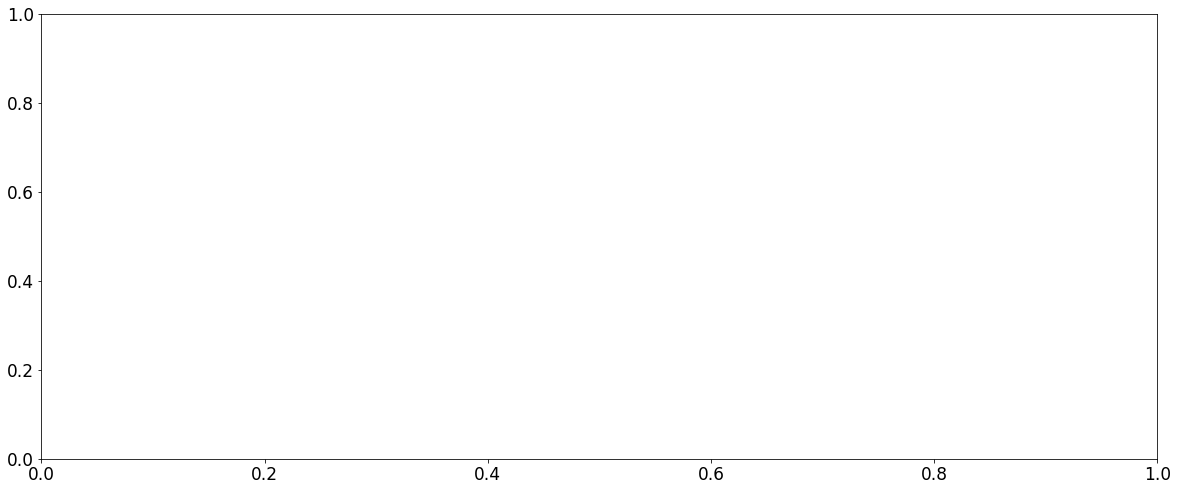

In [10]:
plt.figure(figsize=(20,18))
plt.subplot(211)
plt.hist(Rn_1['CES']/10**3, bins = (700), 
         range=(0, 3000), 
         histtype='bar', color='darkorange',
         alpha = 0.3, label='Rn')
plt.hist(Rn_1['CES']/10**3, bins = (700), 
         range=(0, 3000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N')
plt.yscale('log')

plt.hist(bkg_1['CES']/10**3, bins = (700), 
         range=(0, 3000), 
         histtype='bar', color='darkgreen',
         alpha = 0.3, label='bkg')
plt.hist(bkg_1['CES']/10**3, bins = (700), 
         range=(0, 3000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N')
plt.yscale('log')

plt.vlines(x=1173, ymin=0, ymax=1e4, colors='k', linestyles='dashed')
plt.text(1131, 1.1e4, '$^{60}Co$ 1173 keV', rotation=90, size=15)

plt.vlines(x=1332, ymin=0, ymax=1e4, colors='k', linestyles='dashed')
plt.text(1290, 1.1e4, '$^{60}Co$ 1332 keV', rotation=90, size=15)

plt.vlines(x=1461, ymin=0, ymax=1e4, colors='k', linestyles='dashed')
plt.text(1419, 1.1e4, '$^{40}K$ 1461 keV', rotation=90, size=15)

plt.vlines(x=1764, ymin=0, ymax=1e4, colors='k', linestyles='dashed')
plt.text(1722, 1.1e4, '$^{214}Bi$ 1764 keV', rotation=90, size=15)

plt.vlines(x=2204, ymin=0, ymax=1e4, colors='k', linestyles='dashed')
plt.text(2162, 1.1e4, '$^{214}Bi$ 2204 keV', rotation=90, size=15)

plt.vlines(x=2448, ymin=0, ymax=1e4, colors='k', linestyles='dashed')
plt.text(2406, 1.1e4, '$^{214}Bi$ 2448 keV', rotation=90, size=15)

plt.vlines(x=2614, ymin=0, ymax=1e4, colors='k', linestyles='dashed')
plt.text(2572, 1.1e4, '$^{208}Tl$ 2614 keV', rotation=90, size=15)

plt.legend(loc='best')

plt.subplot(212)
plt.hist(Rn_1['CES']/10**3, bins = (200), 
         range=(2200, 3000), 
         histtype='bar', color='darkorange',
         alpha = 0.3, label='Rn')
plt.hist(Rn_1['CES']/10**3, bins = (200), 
         range=(2200, 3000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N')
plt.yscale('log')

plt.hist(bkg_1['CES']/10**3, bins = (200), 
         range=(2200, 3000), 
         histtype='bar', color='darkgreen',
         alpha = 0.3, label='bkg')
plt.hist(bkg_1['CES']/10**3, bins = (200), 
         range=(2200, 3000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N')
plt.yscale('log')

plt.legend(loc='best')

plt.show()

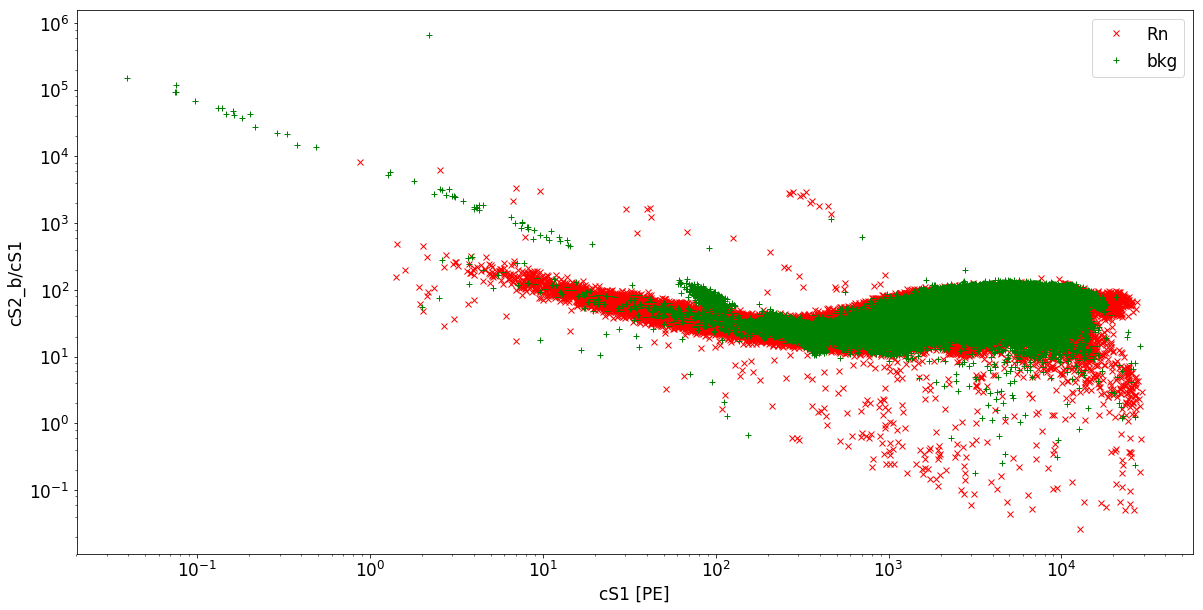

In [22]:
plt.plot(Rn_1['cs1_nn_tf'], Rn_1['cs2_bottom_nn_tf']/Rn_1['cs1_nn_tf'],
         'rx', label='Rn')
plt.plot(bkg_1['cs1_nn_tf'], bkg_1['cs2_bottom_nn_tf']/bkg_1['cs1_nn_tf'],
         'g+', label='bkg')
plt.xscale("log")               # <- Activate log scale on X axis
plt.yscale("log")               # <- Activate log scale on Y axis
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2_b/cS1')

plt.legend(loc='best')
plt.show()

In [23]:
def AmBeMean(cs1):
    return pow(10, 0.409879*np.exp(-cs1/77.8828) + 1.25161 -0.00102623*cs1 + 1.02944/cs1)*cs1
def AmBeP2Sigma(cs1): 
    return pow(10, 0.495746*np.exp(-cs1/34.7852) + 1.55359 -0.0020238*cs1 + 1.1277/cs1)*cs1
def AmBeM2Sigma(cs1): 
    return pow(10, 0.00354183*np.exp(-cs1/0.423288) + 1.34458 -0.00186916*cs1 + 0.782862/cs1)*cs1
#def NGMean(cs1):
#    return pow(10, 0.170987*np.exp(-cs1/40.0256) + 1.47624 -0.00223465*cs1 + 1.36355/cs1)*cs1
def NGP2Sigma(cs1): 
    return pow(10, 0.843921*np.exp(-cs1/106.891) + 1.03573 -1.0002e-05*cs1 + 2.1521/cs1)*cs1
def NGM2Sigma(cs1):
    return pow(10, 28.1276*np.exp(-cs1/0.687178) + 1.38184 -0.00216714*cs1 + 0.450683/cs1)*cs1

def ERMean(cs1):
    return pow(10, -0.453992*np.exp(-cs1/24.2093) + 3.34136 + 0.00207743*cs1)
def ERM2Sigma(cs1):
    return pow(10, -0.527845*np.exp(-cs1/22.7285) + 3.17427 + 0.00213752*cs1)
def ERP2Sigma(cs1):
    return pow(10, -0.384007*np.exp(-cs1/26.7804) + 3.51227 + 0.00199472*cs1)
 
def NGMean(cs1):
    return pow(10, -0.751128*np.exp(-cs1/21.7106) + 3.14988 + 0.00126063*cs1)
def NGM2Sigma(cs1):
    return pow(10, -0.876552*np.exp(-cs1/22.9809) + 2.9467 + 0.00128255*cs1)
def NGP2Sigma(cs1):
    return pow(10, -0.623214*np.exp(-cs1/19.4819) + 3.34643 + 0.00128785*cs1)

def ERMean_SR0(cs1):
    return pow(10, -0.461933*np.exp(-cs1/25.5917) + 3.361 + 0.0022207*cs1)
def ERM2Sigma_SR0(cs1):
    return pow(10, -0.485916*np.exp(-cs1/38.4848) + 3.23709 + 0.00202345*cs1)
def ERP2Sigma_SR0(cs1):
    return pow(10, -0.479579*np.exp(-cs1/15.211) + 3.49323 + 0.00244589*cs1)

def AmBeMean_SR0(cs1):
    return pow(10, -0.729241*np.exp(-cs1/28.5434) + 3.21409 + 0.00111745*cs1)
def AmBeM2Sigma_SR0(cs1):
    return pow(10, -1.0521*np.exp(-cs1/40.3913) + 3.25205 + -0.000374485*cs1)
def AmBeP2Sigma_SR0(cs1):
    return pow(10, -0.522313*np.exp(-cs1/16.8496) + 3.2709 + 0.00213224*cs1)

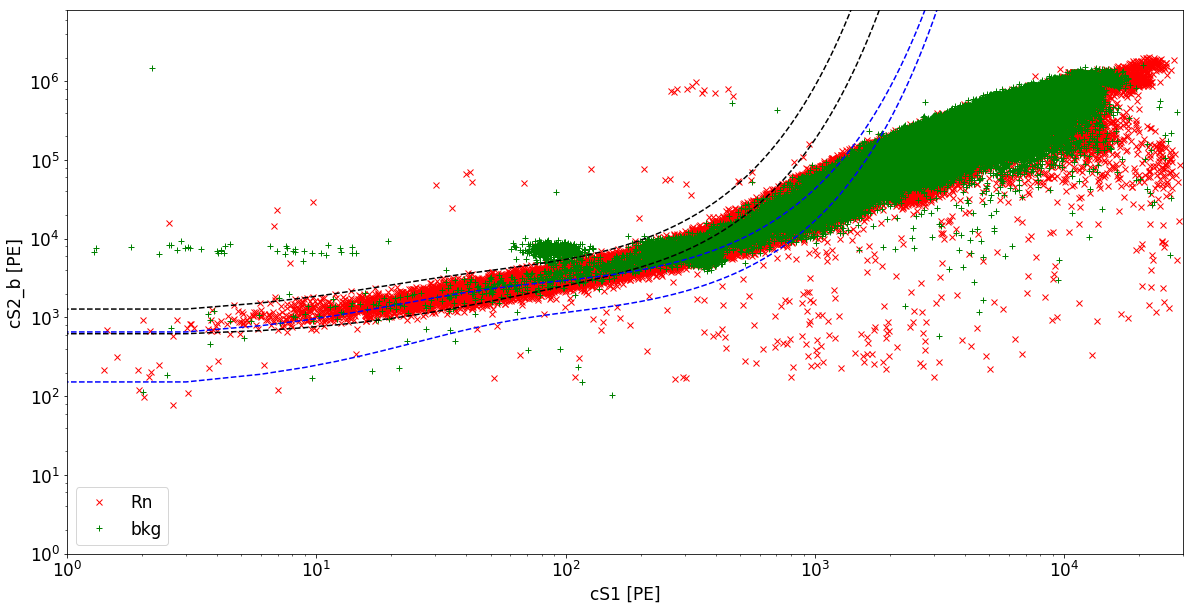

In [24]:
plt.plot(Rn_1['cs1_nn_tf'], Rn_1['cs2_bottom_nn_tf'],
         'rx', label='Rn')
plt.plot(bkg_1['cs1_nn_tf'], bkg_1['cs2_bottom_nn_tf'],
         'g+', label='bkg')
x = np.linspace(0,3e4, 10000)
plt.plot(x, ERM2Sigma_SR0(x), 'k--')
plt.plot(x, ERP2Sigma_SR0(x), 'k--')
plt.plot(x, NGM2Sigma(x), 'b--')
plt.plot(x, NGP2Sigma(x), 'b--')
plt.xscale("log")               # <- Activate log scale on X axis
plt.yscale("log")               # <- Activate log scale on Y axis
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2_b [PE]')
plt.ylim(1, 8e6)
plt.xlim(1, 3e4)

plt.legend(loc='best')
plt.show()

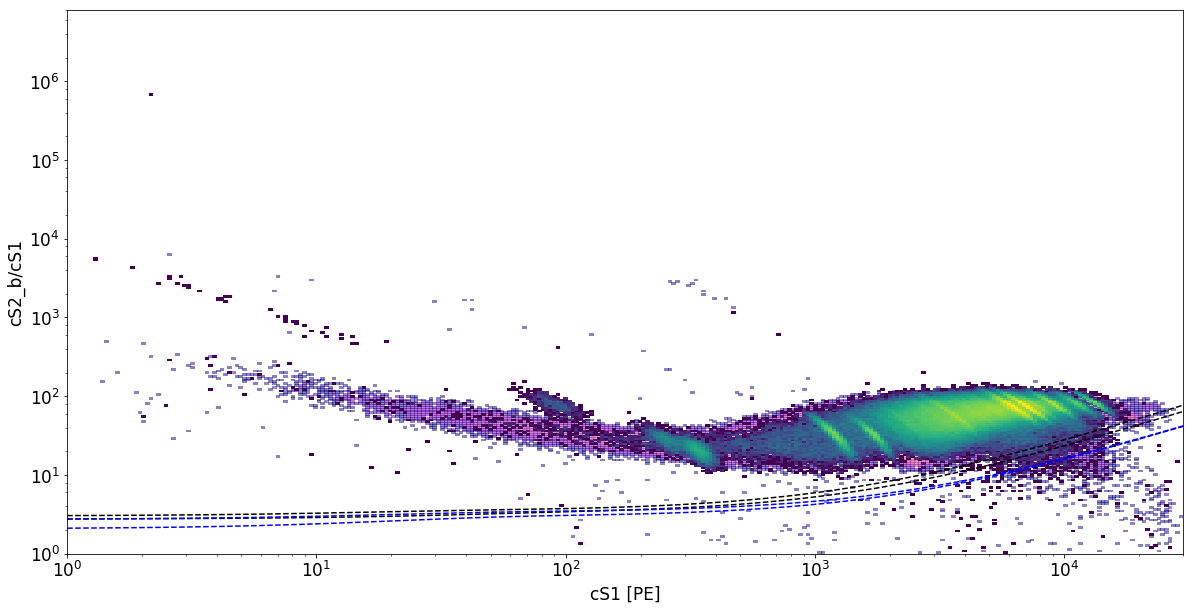

In [25]:
xbins = np.logspace(np.log10(1.0), np.log10(3e4), 300) # <- make a range from 10**xmin to 10**xmax
ybins = np.logspace(np.log10(1.0), np.log10(8e6), 300) # <- make a range from 10**ymin to 10**ymax

counts_bkg, _, _ = np.histogram2d(bkg_1['cs1_nn_tf'], bkg_1['cs2_bottom_nn_tf']/bkg_1['cs1_nn_tf'], 
                                  bins=(xbins, ybins))
counts_Rn, _, _ = np.histogram2d(Rn_1['cs1_nn_tf'], Rn_1['cs2_bottom_nn_tf']/Rn_1['cs1_nn_tf'], 
                                  bins=(xbins, ybins))

pcm_Rn = plt.pcolormesh(xbins, ybins, np.transpose(counts_Rn),
                    cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), alpha=0.5)
pcm_bkg = plt.pcolormesh(xbins, ybins, np.transpose(counts_bkg),
                    cmap=plt.cm.viridis, norm=matplotlib.colors.LogNorm(), alpha=1)
x = np.linspace(10,3e4, 10000)
plt.plot(xbins, np.log10(ERM2Sigma_SR0(xbins)), 'k--')
plt.plot(xbins, np.log10(ERP2Sigma_SR0(xbins)), 'k--')
plt.plot(xbins, np.log10(NGM2Sigma(xbins)), 'b--')
plt.plot(xbins, np.log10(NGP2Sigma(xbins)), 'b--')
#plt.colorbar(pcm, label='Number of events')
plt.xscale("log")               # <- Activate log scale on X axis
plt.yscale("log")               # <- Activate log scale on Y axis
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2_b/cS1')
plt.ylim(0,8e6)

plt.show()